## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


## Import files

In [2]:
def getcsv( filename ):
    temp = np.fromfile( filename, sep=';' )
    numcols = len( temp )
    del( temp )
    df = pd.read_csv( filename, sep=';', names = [ x+1 for x in range(numcols)] )
    return df

In [3]:
def getcsv2( filename ):
    temp = np.fromfile( filename, sep=',' )
    numcols = len( temp )
    del( temp )
    df = pd.read_csv( filename, sep=',', names = [ x+1 for x in range(numcols)] )
    return df

In [4]:
simcol = getcsv2( 'simcol_3.csv' ) #Datos del invernadero colector para simulación
simref = getcsv2( 'simref_3.csv' ) #Datos del invernadero referencia para simulación
simtime = getcsv2( 'simtime_3.csv' )

In [5]:
cols = [ \
    'Record(1)', 'Temperature(1)', 'RelHum(1)', \
    'Ventilation(1)', 'Screening(1)', 'Heating(1)', 'Cooling(1)', \
    'LAI(1)', 'OutTemp(1)', 'OutRelHum(1)', 'OutRad(1)', 'OutWindVel(1)', \
    'HourAngle(1)', 'Declination(1)', 'Elevation(1)', 'RadTheor(1)', \
    'Record(0)', 'Temperature(0)', 'RelHum(0)', \
    'Ventilation(0)', 'Screening(0)', 'Heating(0)', 'Cooling(0)', \
    'LAI(0)', 'OutTemp(0)', 'OutRelHum(0)', 'OutRad(0)', 'OutWindVel(0)', \
    'HourAngle(0)', 'Declination(0)', 'Elevation(0)', 'RadTheor(0)', \
    'Record(-1)', 'Temperature(-1)', 'RelHum(-1)', \
    'Ventilation(-1)', 'Screening(-1)', 'Heating(-1)', 'Cooling(-1)', \
    'LAI(-1)', 'OutTemp(-1)', 'OutRelHum(-1)', 'OutRad(-1)', 'OutWindVel(-1)', \
    'HourAngle(-1)', 'Declination(-1)', 'Elevation(-1)', 'RadTheor(-1)', \
    'Record(-2)', 'Temperature(-2)', 'RelHum(-2)', \
    'Ventilation(-2)', 'Screening(-2)', 'Heating(-2)', 'Cooling(-2)', \
    'LAI(-2)', 'OutTemp(-2)', 'OutRelHum(-2)', 'OutRad(-2)', 'OutWindVel(-2)', \
    'HourAngle(-2)', 'Declination(-2)', 'Elevation(-2)', 'RadTheor(-2)', \
    'Record(-3)', 'Temperature(-3)', 'RelHum(-3)', \
    'Ventilation(-3)', 'Screening(-3)', 'Heating(-3)', 'Cooling(-3)', \
    'LAI(-3)', 'OutTemp(-3)', 'OutRelHum(-3)', 'OutRad(-3)', 'OutWindVel(-3)', \
    'HourAngle(-3)', 'Declination(-3)', 'Elevation(-3)', 'RadTheor(-3)', \
    ]

simcol.columns = cols
simref.columns = cols

cols2 = [ 'Record', 'Day', 'Month', 'Year', 'Hour', 'Minutes', 'Seconds', 'CalWeek', 'Weekday' ]
simtime.columns = cols2

In [6]:
simcol.head()

,Record(1),Temperature(1),RelHum(1),Ventilation(1),Screening(1),Heating(1),Cooling(1),LAI(1),OutTemp(1),OutRelHum(1),...,Cooling(-3),LAI(-3),OutTemp(-3),OutRelHum(-3),OutRad(-3),OutWindVel(-3),HourAngle(-3),Declination(-3),Elevation(-3),RadTheor(-3)
0,377570,22.807584,83.060733,20,0,0.01,0.00,1.944,22.745520,73.462796,...,-0.15,1.944,22.872045,72.371520,-0.043855,1.24,0.065113,16.859,-20.606,-468.82
1,377571,22.811267,83.243846,20,0,0.01,-0.21,1.944,22.723367,73.667801,...,-0.15,1.944,22.832778,72.692941,-0.054380,1.44,0.042021,16.858,-20.651,-469.81
2,377572,22.817240,83.418145,20,0,0.01,-0.21,1.944,22.705113,73.859385,...,-0.15,1.944,22.800235,72.979719,-0.024760,1.44,0.021233,16.857,-20.675,-470.34
3,377573,22.822534,83.583231,20,0,0.00,0.00,1.944,22.686244,74.077195,...,0.00,1.944,22.771665,73.229710,-0.009837,1.49,-0.002036,16.856,-20.684,-470.54
4,377574,22.826299,83.750326,20,0,0.00,0.00,1.944,22.665882,74.334308,...,0.00,1.944,22.745520,73.462796,0.066950,1.47,-0.022833,16.855,-20.676,-470.36


In [7]:
simtime.head()

,Record,Day,Month,Year,Hour,Minutes,Seconds,CalWeek,Weekday
0,377570,4,8,2013,0,5,14,32,1
1,377571,4,8,2013,0,10,0,32,1
2,377572,4,8,2013,0,15,18,32,1
3,377573,4,8,2013,0,20,4,32,1
4,377574,4,8,2013,0,25,21,32,1


## Convert to pandas

In [8]:
from datetime import datetime

In [9]:
simtime['DateTime'] = simtime[ ['Year','Month','Day','Hour','Minutes','Seconds'] ].apply( lambda s: datetime(*s), axis=1 )

In [10]:
# Needed to be able to make slides (for example: for graphs)
simtime.index = simtime['DateTime']
simtime.head()

,Record,Day,Month,Year,Hour,Minutes,Seconds,CalWeek,Weekday,DateTime
DateTime,,,,,,,,,,
2013-08-04 00:05:14,377570,4,8,2013,0,5,14,32,1,2013-08-04 00:05:14
2013-08-04 00:10:00,377571,4,8,2013,0,10,0,32,1,2013-08-04 00:10:00
2013-08-04 00:15:18,377572,4,8,2013,0,15,18,32,1,2013-08-04 00:15:18
2013-08-04 00:20:04,377573,4,8,2013,0,20,4,32,1,2013-08-04 00:20:04
2013-08-04 00:25:21,377574,4,8,2013,0,25,21,32,1,2013-08-04 00:25:21


In [11]:
collector = pd.merge( simtime, simcol, on = simtime['Record'] )
reference = pd.merge( simtime, simref, on = simtime['Record'] )
collector.head()

,Record,Day,Month,Year,Hour,Minutes,Seconds,CalWeek,Weekday,DateTime,...,Cooling(-3),LAI(-3),OutTemp(-3),OutRelHum(-3),OutRad(-3),OutWindVel(-3),HourAngle(-3),Declination(-3),Elevation(-3),RadTheor(-3)
0,377570,4,8,2013,0,5,14,32,1,2013-08-04 00:05:14,...,-0.15,1.944,22.872045,72.371520,-0.043855,1.24,0.065113,16.859,-20.606,-468.82
1,377571,4,8,2013,0,10,0,32,1,2013-08-04 00:10:00,...,-0.15,1.944,22.832778,72.692941,-0.054380,1.44,0.042021,16.858,-20.651,-469.81
2,377572,4,8,2013,0,15,18,32,1,2013-08-04 00:15:18,...,-0.15,1.944,22.800235,72.979719,-0.024760,1.44,0.021233,16.857,-20.675,-470.34
3,377573,4,8,2013,0,20,4,32,1,2013-08-04 00:20:04,...,0.00,1.944,22.771665,73.229710,-0.009837,1.49,-0.002036,16.856,-20.684,-470.54
4,377574,4,8,2013,0,25,21,32,1,2013-08-04 00:25:21,...,0.00,1.944,22.745520,73.462796,0.066950,1.47,-0.022833,16.855,-20.676,-470.36


## Select the day

In [12]:
sim_days = simtime['DateTime'].dt.date

In [13]:
collector.index = collector['DateTime']
reference.index = reference['DateTime']

In [14]:
start = '2013-08-04 00:05:14.000'
end = '2013-08-04 23:55:08.000'
xtime = simtime.DateTime[start:end]

### Theorical and measured Radiation

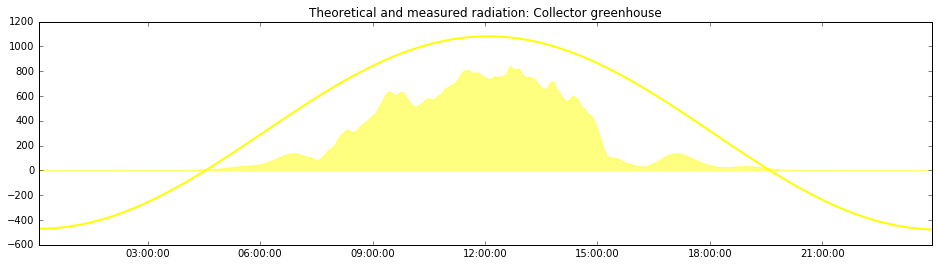

In [15]:
fig, ax = plt.subplots(1, sharex=True, figsize=(16,4))

# This is only to make clear how to index and select ranges:
# Note that the external variables have the same valule for both greenhouses
r0 = collector['RadTheor(0)'][xtime]
rad = collector['OutRad(0)'][xtime]

ax.plot( xtime, r0, color='yellow', linewidth=2.0, label='Theoretical Radiation');
ax.fill_between( np.array(xtime), y1=rad, y2=0, color='yellow', alpha=0.5, label='Measured Radiation' );
ax.set_title('Theoretical and measured radiation: Collector greenhouse');

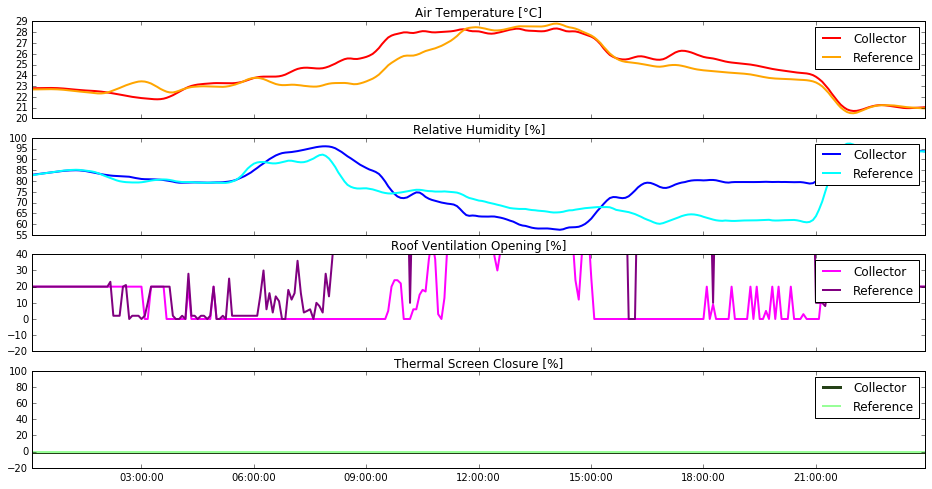

In [16]:

fig, axarr = plt.subplots(4, sharex=True, figsize=(16,8))

# This is only to make clear how to index and select ranges:
col_temp = collector['Temperature(0)'][xtime]
ref_temp = reference['Temperature(0)'][xtime]

col_rh = collector['RelHum(0)'][xtime]
ref_rh = reference['RelHum(0)'][xtime]

col_vent = collector['Ventilation(0)'][xtime]
ref_vent = reference['Ventilation(0)'][xtime]

col_screen = collector['Screening(0)'][xtime]
ref_screen = reference['Screening(0)'][xtime]


axarr[0].plot( xtime, col_temp, color='red', linewidth=2.0, label='Collector');
axarr[0].plot( xtime, ref_temp, color='orange', linewidth=2.0, label='Reference');
axarr[0].set_title('Air Temperature [°C]');
axarr[0].legend();

axarr[1].plot( xtime, col_rh, color='blue', linewidth=2.0, label='Collector');
axarr[1].plot( xtime, ref_rh, color='cyan', linewidth=2.0, label='Reference');
axarr[1].set_title('Relative Humidity [%]');
axarr[1].legend();

axarr[2].plot( xtime, col_vent, color='magenta', linewidth=2.0, label='Collector');
axarr[2].plot( xtime, ref_vent, color='#800080', linewidth=2.0, label='Reference');
axarr[2].set_title('Roof Ventilation Opening [%]');
axarr[2].legend();
axarr[2].set_ylim([-20,40]);

axarr[3].plot( xtime, col_screen, color='#254117', linewidth=3.0, label='Collector');
axarr[3].plot( xtime, ref_screen, color='#98FF98', linewidth=2.0, label='Reference');
axarr[3].set_title('Thermal Screen Closure [%]');
axarr[3].legend();
axarr[3].set_ylim([-20,100]);

## Simulation

### Recreating the networks

In [17]:
import pybrain
from pybrain.structure import RecurrentNetwork, FeedForwardNetwork, LinearLayer, SigmoidLayer, FullConnection
from IPython.display import Image
from pybrain.structure import connections

In [18]:
netF = FeedForwardNetwork()
netR = RecurrentNetwork()
netR2 = RecurrentNetwork()
    
    
inpF = LinearLayer(24)
hidF = SigmoidLayer(24)
outF = LinearLayer(2)

inpR = LinearLayer(8, name='in')
hidR = SigmoidLayer(8, name='hidden')
outR = LinearLayer(2, name='out')

inpR2 = LinearLayer(8, name='in2')
hidR2 = SigmoidLayer(8, name='hidden2')
outR2 = LinearLayer(2, name='out2')
    
netF.addInputModule(inpF)
netF.addModule(hidF)
netF.addOutputModule(outF)


netR.addInputModule(inpR)
netR.addModule(hidR)
netR.addOutputModule(outR)

netR2.addInputModule(inpR2)
netR2.addModule(hidR2)
netR2.addOutputModule(outR2)

#Feedforward connections

netF.addConnection(FullConnection(inpF,hidF))
netF.addConnection(FullConnection(hidF,outF))
netF.sortModules()

netR.addConnection(FullConnection(netR['in'],netR['hidden'], name='c1'))
netR.addConnection(FullConnection(netR['hidden'],netR['out'], name='c2'))
netR.sortModules()

netR2.addConnection(FullConnection(netR2['in2'],netR2['hidden2'], name='c3'))
netR2.addConnection(FullConnection(netR2['hidden2'],netR2['out2'], name='c4'))
netR2.sortModules()

#Recurrent connections

netR.addRecurrentConnection(FullConnection(netR['in'],netR['in'], name='cR1'))
netR.addRecurrentConnection(FullConnection(netR['hidden'],netR['hidden'], name='cR2'))
netR.addRecurrentConnection(FullConnection(netR['out'],netR['out'], name='cR3'))
netR.sortModules()

netR2.addRecurrentConnection(FullConnection(netR2['in2'],netR2['in2'], name='cR4'))
netR2.addRecurrentConnection(FullConnection(netR2['hidden2'],netR2['hidden2'], name='cR5'))
netR2.addRecurrentConnection(FullConnection(netR2['out2'],netR2['out2'], name='cR6'))
netR2.sortModules()

### Setting the weights

In [19]:
def set_weights(n,wf,wr): ## n es la red, wf es el arreglo de pesos FF, wr es el arreglo de pesos RN 
    n.reset()
    for mod in n.modules:
        for conn in n.connections[mod]:
            for cc in range(len(conn.params)):
                conn.params[cc]=wf[cc]
   
    if hasattr(n, "recurrentConns"):
        for rcon in n.recurrentConns:
            for rc in range(len(rcon.params)):
                rcon.params[rc]=wf[rc]
     

In [20]:
WF=getcsv2('netF.csv')
WR=getcsv2('netR.csv')
WR2=getcsv2('netR2.csv')

In [21]:
FF_weights=WF.get_values()
R_weights=WR.get_values()
R2_weights=WR2.get_values()

In [22]:
set_weights(netF,FF_weights[0],FF_weights[1])
set_weights(netR,R_weights[0],R_weights[1])
set_weights(netR2,R2_weights[0],R2_weights[1])

## Simulating on my birthday

In [23]:
mm = pd.read_csv( 'mm.csv', sep=',', names = [ x+1 for x in range(0,80)] )
indexm=(["maximos","minimos"])
mm.columns=cols
mm.index=indexm

In [24]:
i=max(mm['Temperature(1)']["maximos"],mm['Temperature(0)']["maximos"],\
   mm['Temperature(-1)']["maximos"],mm['Temperature(-2)']["maximos"])

j=min(mm['RelHum(1)']["minimos"],mm['RelHum(0)']["minimos"],\
   mm['RelHum(-1)']["minimos"],mm['RelHum(-2)']["minimos"])


In [25]:
simcol.head()

,Record(1),Temperature(1),RelHum(1),Ventilation(1),Screening(1),Heating(1),Cooling(1),LAI(1),OutTemp(1),OutRelHum(1),...,Cooling(-3),LAI(-3),OutTemp(-3),OutRelHum(-3),OutRad(-3),OutWindVel(-3),HourAngle(-3),Declination(-3),Elevation(-3),RadTheor(-3)
0,377570,22.807584,83.060733,20,0,0.01,0.00,1.944,22.745520,73.462796,...,-0.15,1.944,22.872045,72.371520,-0.043855,1.24,0.065113,16.859,-20.606,-468.82
1,377571,22.811267,83.243846,20,0,0.01,-0.21,1.944,22.723367,73.667801,...,-0.15,1.944,22.832778,72.692941,-0.054380,1.44,0.042021,16.858,-20.651,-469.81
2,377572,22.817240,83.418145,20,0,0.01,-0.21,1.944,22.705113,73.859385,...,-0.15,1.944,22.800235,72.979719,-0.024760,1.44,0.021233,16.857,-20.675,-470.34
3,377573,22.822534,83.583231,20,0,0.00,0.00,1.944,22.686244,74.077195,...,0.00,1.944,22.771665,73.229710,-0.009837,1.49,-0.002036,16.856,-20.684,-470.54
4,377574,22.826299,83.750326,20,0,0.00,0.00,1.944,22.665882,74.334308,...,0.00,1.944,22.745520,73.462796,0.066950,1.47,-0.022833,16.855,-20.676,-470.36


In [26]:
def norm(x,maxi,mini):
    Vnorm=(2*((x-mini)/(maxi-mini)))-1
    return Vnorm  

In [27]:
def a_norm(y,maxi,mini):
    a=y+1
    b=maxi-mini
    c=a*b
    d=c/2
    Anorm=d+mini
    return Anorm

In [28]:
Ntest_col = pd.DataFrame(columns=simcol.columns)
Ntest_ref = pd.DataFrame(columns=simref.columns)

for n in range(1,simcol.shape[1]):
    ar=simcol[simcol.columns[n]]
    Ntest_col[Ntest_col.columns[n]]=norm(ar,mm[mm.columns[n]]["maximos"],mm[mm.columns[n]]["minimos"])

for n in range(1,simref.shape[1]):
    ar=simref[simref.columns[n]]
    Ntest_ref[Ntest_ref.columns[n]]=norm(ar,mm[mm.columns[n]]["maximos"],mm[mm.columns[n]]["minimos"])
    

In [29]:
stest_col=np.array([Ntest_col['Temperature(-2)'],Ntest_col['RelHum(-2)'],\
            Ntest_col['Ventilation(-2)'],Ntest_col['Screening(-2)'], \
            Ntest_col['HourAngle(-2)'],Ntest_col['Declination(-2)'],\
            Ntest_col['Elevation(-2)'],Ntest_col['RadTheor(-2)'], \
            Ntest_col['Temperature(-1)'],Ntest_col['RelHum(-1)'],\
            Ntest_col['Ventilation(-1)'],Ntest_col['Screening(-1)'], \
            Ntest_col['HourAngle(-1)'],Ntest_col['Declination(-1)'],\
            Ntest_col['Elevation(-1)'],Ntest_col['RadTheor(-1)'], \
            Ntest_col['Temperature(0)'],Ntest_col['RelHum(0)'],\
            Ntest_col['Ventilation(0)'],Ntest_col['Screening(0)'], \
            Ntest_col['HourAngle(0)'],Ntest_col['Declination(0)'],\
            Ntest_col['Elevation(0)'],Ntest_col['RadTheor(0)']]).T

ttest_col=np.array([Ntest_col['Temperature(1)'],Ntest_col['RelHum(1)']]).T     


stest_ref=np.array([Ntest_ref['Temperature(-2)'],Ntest_ref['RelHum(-2)'],\
            Ntest_ref['Ventilation(-2)'],Ntest_ref['Screening(-2)'], \
            Ntest_ref['HourAngle(-2)'],Ntest_ref['Declination(-2)'],\
            Ntest_ref['Elevation(-2)'],Ntest_ref['RadTheor(-2)'], \
            Ntest_ref['Temperature(-1)'],Ntest_ref['RelHum(-1)'],\
            Ntest_ref['Ventilation(-1)'],Ntest_ref['Screening(-1)'], \
            Ntest_ref['HourAngle(-1)'],Ntest_ref['Declination(-1)'],\
            Ntest_ref['Elevation(-1)'],Ntest_ref['RadTheor(-1)'], \
            Ntest_ref['Temperature(0)'],Ntest_ref['RelHum(0)'],\
            Ntest_ref['Ventilation(0)'],Ntest_ref['Screening(0)'], \
            Ntest_ref['HourAngle(0)'],Ntest_ref['Declination(0)'],\
            Ntest_ref['Elevation(0)'],Ntest_ref['RadTheor(0)']]).T

ttest_ref=np.array([Ntest_ref['Temperature(1)'],Ntest_ref['RelHum(1)']]).T     


In [30]:
stest_colR=np.array([Ntest_col['Temperature(0)'],Ntest_col['RelHum(0)'],\
            Ntest_col['Ventilation(0)'],Ntest_col['Screening(0)'], \
            Ntest_col['HourAngle(0)'],Ntest_col['Declination(0)'],\
            Ntest_col['Elevation(0)'],Ntest_col['RadTheor(0)']]).T

ttest_colR=np.array([Ntest_col['Temperature(1)'],Ntest_col['RelHum(1)']]).T  


stest_refR=np.array([Ntest_ref['Temperature(0)'],Ntest_ref['RelHum(0)'],\
            Ntest_ref['Ventilation(0)'],Ntest_ref['Screening(0)'], \
            Ntest_ref['HourAngle(0)'],Ntest_ref['Declination(0)'],\
            Ntest_ref['Elevation(0)'],Ntest_ref['RadTheor(0)']]).T

ttest_refR=np.array([Ntest_ref['Temperature(1)'],Ntest_ref['RelHum(1)']]).T 

## Feedforward network

In [31]:

#_______________________________Collector Greenhouse__________________________

sim_col=np.array([])
for inps in (stest_col):
    netF.reset()
    sim_col=np.append(sim_col,netF.activate( inps ))

sim_col=np.reshape(sim_col,[len(ttest_col),2])    

#______________________________Reference Greenhouse___________________________

sim_ref=np.array([])
for inps in (stest_ref):
    netF.reset()
    sim_ref=np.append(sim_ref,netF.activate( inps ))
    
sim_ref=np.reshape(sim_ref,[len(ttest_ref),2])    


In [32]:
temperature_col=np.array([])
temperature_ref=np.array([])

RelHum_col=np.array([])
RelHum_ref=np.array([])

for n in range(0,sim_col.shape[0]):
    sim_col[n][0]=a_norm(sim_col[n][0],mm['Temperature(1)']["maximos"],mm['Temperature(1)']["minimos"])
    sim_ref[n][0]=a_norm(sim_ref[n][0],mm['Temperature(1)']["maximos"],mm['Temperature(1)']["minimos"])
    temperature_col=np.append(temperature_col,sim_col[n][0])
    temperature_ref=np.append(temperature_ref,sim_ref[n][0])
    
for n in range(0,sim_col.shape[0]):
    sim_col[n][1]=a_norm(sim_col[n][1],mm['RelHum(1)']["maximos"],mm['RelHum(1)']["minimos"])
    sim_ref[n][1]=a_norm(sim_ref[n][1],mm['RelHum(1)']["maximos"],mm['RelHum(1)']["minimos"])
    RelHum_col=np.append(RelHum_col,sim_col[n][1])
    RelHum_ref=np.append(RelHum_ref,sim_ref[n][1])
    

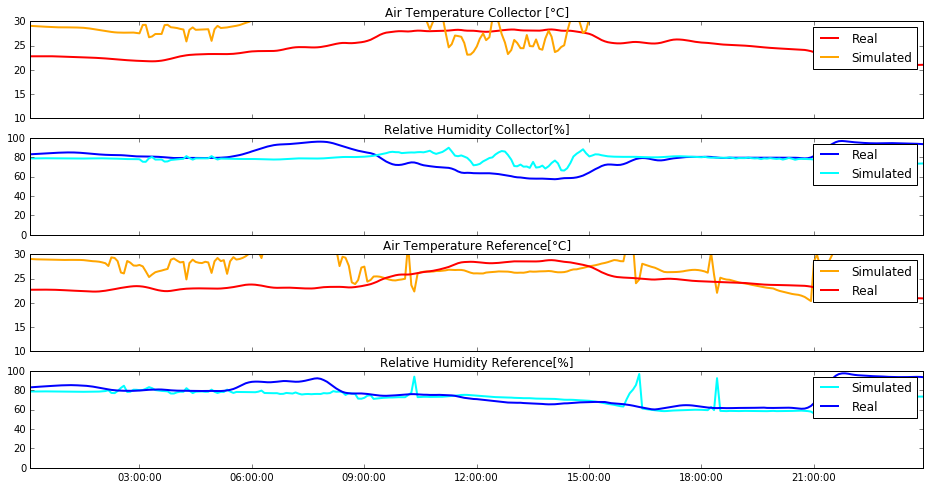

In [33]:
fig1, axarr1 = plt.subplots(4, sharex=True, figsize=(16,8))

# This is only to make clear how to index and select ranges:
col_temp = collector['Temperature(1)']
ref_temp = reference['Temperature(1)']

col_rh = collector['RelHum(1)']
ref_rh = reference['RelHum(1)']



axarr1[0].plot( xtime, col_temp, color='red', linewidth=2.0, label='Real');
axarr1[0].plot( xtime, temperature_col, color='orange', linewidth=2.0, label='Simulated');
axarr1[0].set_title('Air Temperature Collector [°C]');
axarr1[0].set_ylim([10,30]);
axarr1[0].legend();

axarr1[1].plot( xtime, col_rh, color='blue', linewidth=2.0, label='Real');
axarr1[1].plot( xtime, RelHum_col, color='cyan', linewidth=2.0, label='Simulated');
axarr1[1].set_title('Relative Humidity Collector[%]');
axarr1[1].set_ylim([0,100]);
axarr1[1].legend();

axarr1[2].plot( xtime, temperature_ref, color='orange', linewidth=2.0, label='Simulated');
axarr1[2].plot( xtime, ref_temp, color='red', linewidth=2.0, label='Real');
axarr1[2].set_title('Air Temperature Reference[°C]');
axarr1[2].set_ylim([10,30]);
axarr1[2].legend();

axarr1[3].plot( xtime, RelHum_ref, color='cyan', linewidth=2.0, label='Simulated');
axarr1[3].plot( xtime, ref_rh, color='blue', linewidth=2.0, label='Real');
axarr1[3].set_title('Relative Humidity Reference[%]');
axarr1[3].set_ylim([0,100]);
axarr1[3].legend();

## Recurrent network 1

In [34]:

#_______________________________Collector Greenhouse__________________________

sim_colR=np.array([])
for inps in (stest_colR):
    netR.reset()
    sim_colR=np.append(sim_colR,netR.activate( inps ))

sim_colR=np.reshape(sim_colR,[len(ttest_colR),2])    

#______________________________Reference Greenhouse___________________________

sim_refR=np.array([])
for inps in (stest_refR):
    netR.reset()
    sim_refR=np.append(sim_refR,netR.activate( inps ))
    
sim_refR=np.reshape(sim_refR,[len(ttest_refR),2])    


In [35]:
temperature_colR=np.array([])
temperature_refR=np.array([])

RelHum_colR=np.array([])
RelHum_refR=np.array([])

for n in range(0,sim_colR.shape[0]):
    sim_colR[n][0]=a_norm(sim_colR[n][0],mm['Temperature(1)']["maximos"],mm['Temperature(1)']["minimos"])
    sim_refR[n][0]=a_norm(sim_refR[n][0],mm['Temperature(1)']["maximos"],mm['Temperature(1)']["minimos"])
    temperature_colR=np.append(temperature_colR,sim_colR[n][0])
    temperature_refR=np.append(temperature_refR,sim_refR[n][0])
    
for n in range(0,sim_colR.shape[0]):
    sim_colR[n][1]=a_norm(sim_colR[n][1],mm['RelHum(1)']["maximos"],mm['RelHum(1)']["minimos"])
    sim_refR[n][1]=a_norm(sim_refR[n][1],mm['RelHum(1)']["maximos"],mm['RelHum(1)']["minimos"])
    RelHum_colR=np.append(RelHum_colR,sim_colR[n][1])
    RelHum_refR=np.append(RelHum_refR,sim_refR[n][1])

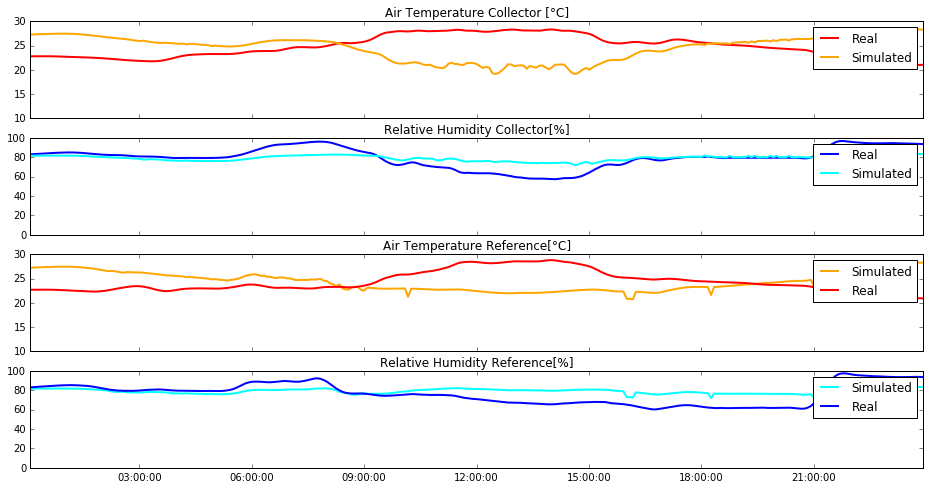

In [36]:
fig2, axarr2 = plt.subplots(4, sharex=True, figsize=(16,8))

# This is only to make clear how to index and select ranges:
col_temp = collector['Temperature(1)']
ref_temp = reference['Temperature(1)']

col_rh = collector['RelHum(1)']
ref_rh = reference['RelHum(1)']



axarr2[0].plot( xtime, col_temp, color='red', linewidth=2.0, label='Real');
axarr2[0].plot( xtime, temperature_colR, color='orange', linewidth=2.0, label='Simulated');
axarr2[0].set_title('Air Temperature Collector [°C]');
axarr2[0].set_ylim([10,30]);
axarr2[0].legend();

axarr2[1].plot( xtime, col_rh, color='blue', linewidth=2.0, label='Real');
axarr2[1].plot( xtime, RelHum_colR, color='cyan', linewidth=2.0, label='Simulated');
axarr2[1].set_title('Relative Humidity Collector[%]');
axarr2[1].set_ylim([0,100]);
axarr2[1].legend();

axarr2[2].plot( xtime, temperature_refR, color='orange', linewidth=2.0, label='Simulated');
axarr2[2].plot( xtime, ref_temp, color='red', linewidth=2.0, label='Real');
axarr2[2].set_title('Air Temperature Reference[°C]');
axarr2[2].set_ylim([10,30]);
axarr2[2].legend();

axarr2[3].plot( xtime, RelHum_refR, color='cyan', linewidth=2.0, label='Simulated');
axarr2[3].plot( xtime, ref_rh, color='blue', linewidth=2.0, label='Real');
axarr2[3].set_title('Relative Humidity Reference[%]');
axarr2[3].set_ylim([0,100]);
axarr2[3].legend();

## Recurrent Network 2

In [37]:

#_______________________________Collector Greenhouse__________________________

sim_colR2=np.array([])
for inps in (stest_colR):
    netR2.reset()
    sim_colR2=np.append(sim_colR2,netR2.activate( inps ))

sim_colR2=np.reshape(sim_colR2,[len(ttest_colR),2])    

#______________________________Reference Greenhouse___________________________

sim_refR2=np.array([])
for inps in (stest_refR):
    netR2.reset()
    sim_refR2=np.append(sim_refR2,netR2.activate( inps ))
    
sim_refR2=np.reshape(sim_refR2,[len(ttest_refR),2])    


In [38]:
temperature_colR2=np.array([])
temperature_refR2=np.array([])

RelHum_colR2=np.array([])
RelHum_refR2=np.array([])

for n in range(0,sim_colR2.shape[0]):
    sim_colR2[n][0]=a_norm(sim_colR2[n][0],mm['Temperature(1)']["minimos"],mm['Temperature(1)']["maximos"])
    sim_refR2[n][0]=a_norm(sim_refR2[n][0],mm['Temperature(1)']["minimos"],mm['Temperature(1)']["maximos"])
    temperature_colR2=np.append(temperature_colR2,sim_colR2[n][0])
    temperature_refR2=np.append(temperature_refR2,sim_refR2[n][0])
    
for n in range(0,sim_colR.shape[0]):
    sim_colR2[n][1]=a_norm(sim_colR2[n][1],mm['RelHum(1)']["maximos"],mm['RelHum(1)']["minimos"])
    sim_refR2[n][1]=a_norm(sim_refR2[n][1],mm['RelHum(1)']["maximos"],mm['RelHum(1)']["minimos"])
    RelHum_colR2=np.append(RelHum_colR2,sim_colR2[n][1])
    RelHum_refR2=np.append(RelHum_refR2,sim_refR2[n][1])

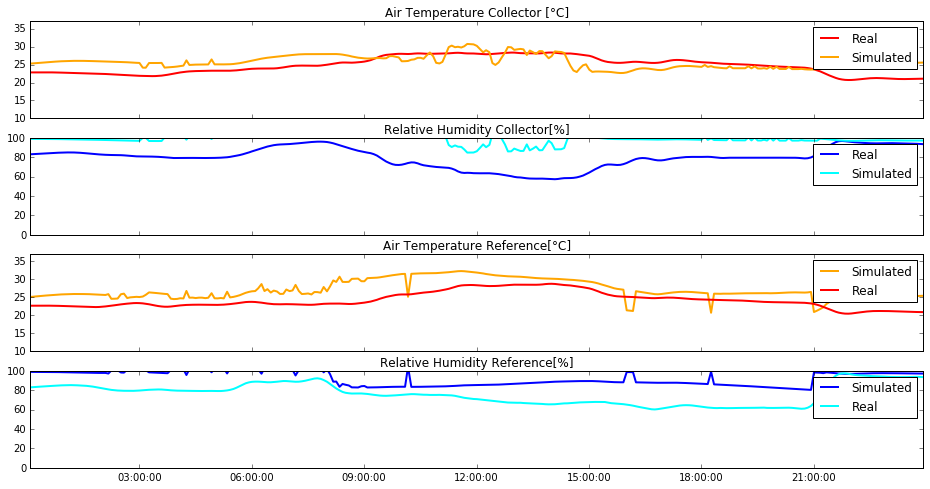

In [39]:
fig3, axarr3 = plt.subplots(4, sharex=True, figsize=(16,8))

# This is only to make clear how to index and select ranges:
col_temp = collector['Temperature(1)']
ref_temp = reference['Temperature(1)']

col_rh = collector['RelHum(1)']
ref_rh = reference['RelHum(1)']



axarr3[0].plot( xtime, col_temp, color='red', linewidth=2.0, label='Real');
axarr3[0].plot( xtime, temperature_colR2, color='orange', linewidth=2.0, label='Simulated');
axarr3[0].set_title('Air Temperature Collector [°C]');
axarr3[0].set_ylim([10,37]);
axarr3[0].legend();

axarr3[1].plot( xtime, col_rh, color='blue', linewidth=2.0, label='Real');
axarr3[1].plot( xtime, RelHum_colR2, color='cyan', linewidth=2.0, label='Simulated');
axarr3[1].set_title('Relative Humidity Collector[%]');
axarr3[1].set_ylim([0,100]);
axarr3[1].legend();

axarr3[2].plot( xtime, temperature_refR2, color='orange', linewidth=2.0, label='Simulated');
axarr3[2].plot( xtime, ref_temp, color='red', linewidth=2.0, label='Real');
axarr3[2].set_title('Air Temperature Reference[°C]');
axarr3[2].set_ylim([10,37]);
axarr3[2].legend();

axarr3[3].plot( xtime, RelHum_refR2, color='blue', linewidth=2.0, label='Simulated');
axarr3[3].plot( xtime, ref_rh, color='cyan', linewidth=2.0, label='Real');
axarr3[3].set_title('Relative Humidity Reference[%]');
axarr3[3].set_ylim([0,100]);
axarr3[3].legend();

## The three networks together

### Collector

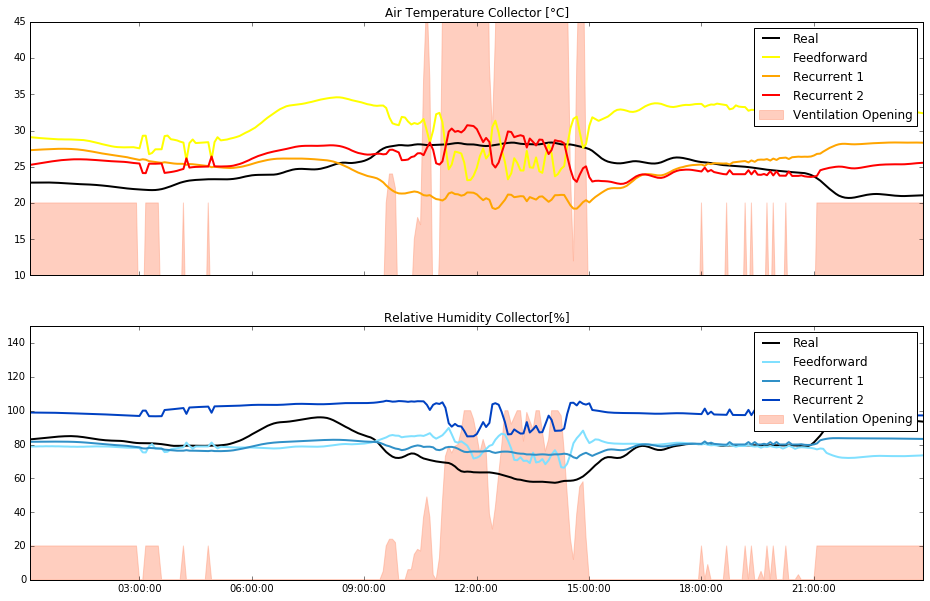

In [40]:
fig4, axarr4 = plt.subplots(2, sharex=True, figsize=(16,10))

# This is only to make clear how to index and select ranges:
col_temp = collector['Temperature(1)']

col_rh = collector['RelHum(1)']
col_vent = collector['Ventilation(1)']




axarr4[0].plot( xtime, col_temp, color='black', linewidth=2.0, label='Real');
axarr4[0].plot( xtime, temperature_col, color='yellow', linewidth=2.0, label='Feedforward');
axarr4[0].plot( xtime, temperature_colR, color='orange', linewidth=2.0, label='Recurrent 1');
axarr4[0].plot( xtime, temperature_colR2, color='red', linewidth=2.0, label='Recurrent 2');
axarr4[0].fill_between( np.array(xtime), y1=col_vent, y2=0, color='#FF9F80', alpha=0.5, label='Ventilation Opening' );
axarr4[0].set_title('Air Temperature Collector [°C]');
axarr4[0].set_ylim([10,45]);
axarr4[0].legend();

axarr4[1].plot( xtime, col_rh, color='black', linewidth=2.0, label='Real');
axarr4[1].plot( xtime, RelHum_col, color='#80E0FF', linewidth=2.0, label='Feedforward');
axarr4[1].plot( xtime, RelHum_colR, color='#3090C7', linewidth=2.0, label='Recurrent 1');
axarr4[1].plot( xtime, RelHum_colR2, color='#0041C2', linewidth=2.0, label='Recurrent 2');
axarr4[1].fill_between( np.array(xtime), y1=col_vent, y2=0, color='#FF9F80', alpha=0.5, label='Ventilation Opening' );
axarr4[1].set_title('Relative Humidity Collector[%]');
axarr4[1].set_ylim([0,150]);
axarr4[1].legend();

### Reference

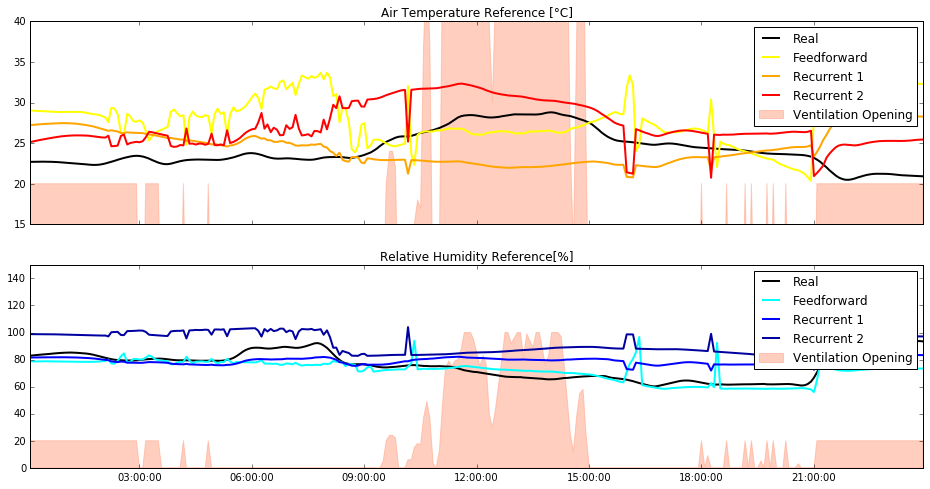

In [41]:
fig5, axarr5 = plt.subplots(2, sharex=True, figsize=(16,8))

# This is only to make clear how to index and select ranges:
ref_temp = reference['Temperature(1)']

ref_rh = reference['RelHum(1)']

ref_vent = reference['Ventilation(1)']



axarr5[0].plot( xtime, ref_temp, color='black', linewidth=2.0, label='Real');
axarr5[0].plot( xtime, temperature_ref, color='yellow', linewidth=2.0, label='Feedforward');
axarr5[0].plot( xtime, temperature_refR, color='orange', linewidth=2.0, label='Recurrent 1');
axarr5[0].plot( xtime, temperature_refR2, color='red', linewidth=2.0, label='Recurrent 2');
axarr5[0].fill_between( np.array(xtime), y1=col_vent, y2=0, color='#FF9F80', alpha=0.5, label='Ventilation Opening' );
axarr5[0].set_title('Air Temperature Reference [°C]');
axarr5[0].set_ylim([15,40]);
axarr5[0].legend();

axarr5[1].plot( xtime, ref_rh, color='black', linewidth=2.0, label='Real');
axarr5[1].plot( xtime, RelHum_ref, color='cyan', linewidth=2.0, label='Feedforward');
axarr5[1].plot( xtime, RelHum_refR, color='blue', linewidth=2.0, label='Recurrent 1');
axarr5[1].plot( xtime, RelHum_refR2, color='#0000A0', linewidth=2.0, label='Recurrent 2');
axarr5[1].fill_between( np.array(xtime), y1=col_vent, y2=0, color='#FF9F80', alpha=0.5, label='Ventilation Opening' );
axarr5[1].set_title('Relative Humidity Reference[%]');
axarr5[1].set_ylim([0,150]);
axarr5[1].legend();

In [42]:
ttest_ref[0]

array([-0.12035191,  0.51274559])